In [1]:
# Macro magic begins here
%matplotlib inline
# Style fix if you are viewing using dark theme like I am.
#style.use('dark_background')

In [2]:
# Import necessary libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
#import scipy 
#import re
#import os
#import sys 
#import matplotlib.dates
# Not using sql so far, so not needed.
# import sqlite3
# import sqlalchemy

# import warnings
#from datetime import datetime
#from tabulate import tabulate
#from matplotlib import style
#style.use('dark_background')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# Load the classification models

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss, recall_score, confusion_matrix, \
                            auc, accuracy_score, roc_curve, roc_auc_score

# Load the package for neural network

from sklearn.neural_network import MLPClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
import keras_metrics
from keras import backend as K
from keras.utils import to_categorical
from sklearn.metrics import log_loss, recall_score, confusion_matrix, \
                            auc, accuracy_score, roc_curve


Using TensorFlow backend.
E:\Users\Jigglypuff\anaconda3\envs\Erdos\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Users\Jigglypuff\anaconda3\envs\Erdos\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Users\Jigglypuff\anaconda3\envs\Erdos\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Users\Jigglypuff\anaconda3\en

In [3]:
#Preprocessing the data set with one hot encode
df = pd.read_csv("clean.csv", index_col=0)
total_click=0
temp_click=np.zeros(10000)
index=np.zeros(10000)
for i in np.array(range(0,10000,1)):
    total_click=total_click+df.click[i+1]
    index[i] = i+1
    temp_click[i]=total_click
#    acme['Clickcount'][i]=total_click
df['total_count']=temp_click
df['id']=index
df['rank_exp'] = np.exp(df['rank'])
df['1'] = pd.get_dummies(df['rank'])[1]
df['2'] = pd.get_dummies(df['rank'])[2]
df['3'] = pd.get_dummies(df['rank'])[3]
df['4'] = pd.get_dummies(df['rank'])[4]
df['5'] = pd.get_dummies(df['rank'])[5]
df['nov'] = pd.get_dummies(df['number_of_vehicles'])[2]
df['nod'] = pd.get_dummies(df['number_of_drivers'])[2]
df = df.drop('number_of_vehicles',axis=1)
df = df.drop('number_of_drivers',axis=1)
df=df.astype('int32')

In [4]:
#after data cleaning
#df.head()

In [5]:

lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=1000)
gb = GradientBoostingClassifier()
ridge = Ridge()
# Import all the models
alpha=0.01
#alpha=0.05,0.02,0.01,0.005
lasso = Lasso(alpha, normalize = True, max_iter = 1000000)

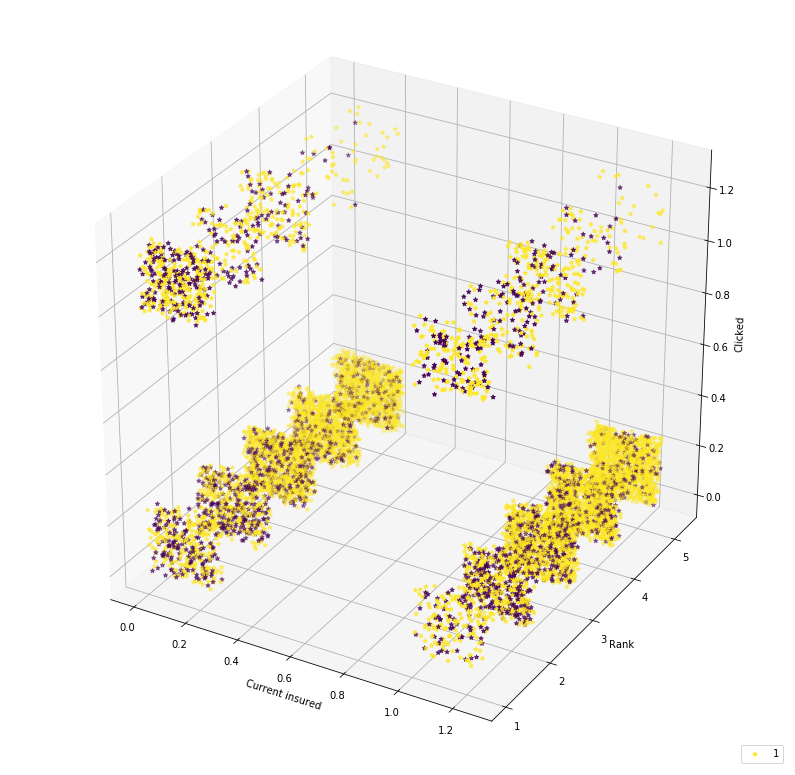

In [6]:
# Cluster plot analysis
# Code by yuxin
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
RAND_RANGE = .25
x = np.array(df['currently_insured'])+np.random.uniform(0,RAND_RANGE,10000)
y = np.array(df['rank'])+np.random.uniform(0,RAND_RANGE,10000)
z = np.array(df['click'])+np.random.uniform(0,RAND_RANGE,10000)

ax.scatter(x, y, z, c=df['married'], marker='*')
ax.set_xlabel('Current insured')
ax.set_ylabel('Rank')
ax.set_zlabel('Clicked')

ax.legend(df['married'],loc="lower right")

plt.show()

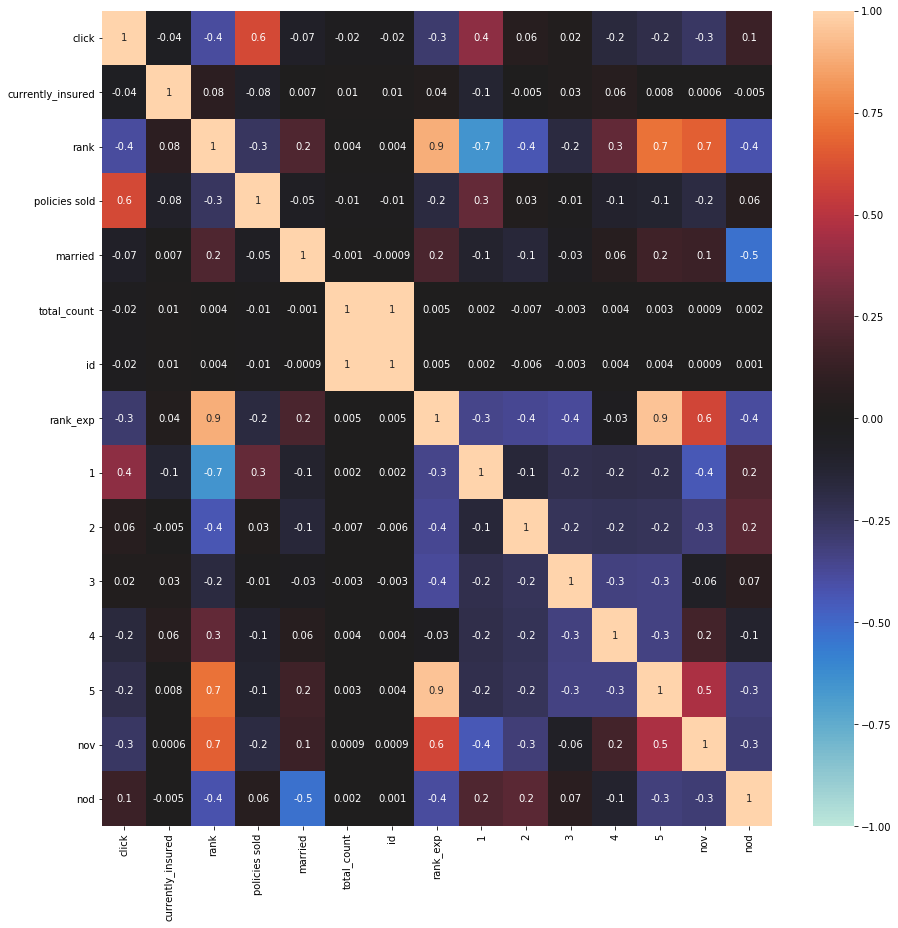

In [40]:
# Heatmap for all variables

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.1g', vmin=-1, vmax=1, center= 0)


In [8]:
# Heatmap for selected variables
'''
plt.figure(figsize=(15,15))

predictdf=df.drop(columns=['click','policies sold','rank', 'nov'])
sns.heatmap(predictdf.corr(),annot=True,fmt='.1g', vmin=-1, vmax=1, center= 0)
'''

"\nplt.figure(figsize=(15,15))\n\npredictdf=df.drop(columns=['click','policies sold','rank', 'nov'])\nsns.heatmap(predictdf.corr(),annot=True,fmt='.1g', vmin=-1, vmax=1, center= 0)\n"

In [9]:
'''
plt.figure(figsize=(15,15))

predictdf=df.drop(columns=[ '1', '2', '3', '4', '5', 'rank_exp','total_count'])
sns.heatmap(predictdf.corr(),annot=True,fmt='.1g', vmin=-1, vmax=1, center= 0)
'''

"\nplt.figure(figsize=(15,15))\n\npredictdf=df.drop(columns=[ '1', '2', '3', '4', '5', 'rank_exp','total_count'])\nsns.heatmap(predictdf.corr(),annot=True,fmt='.1g', vmin=-1, vmax=1, center= 0)\n"

# Classification problem

In [10]:
# Training set splitting

#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['click','policies sold','rank', 'nov','nod']), df['click'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['click','policies sold','rank', 'nov','id','total_count','rank_exp']), df['click'], test_size=0.2, random_state=17659)
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['click','policies sold','rank', 'nod']), df['click'], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['click','policies sold','rank', '1','2','3','4','5']), df['click'], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['click','policies sold','rank', 'total_count']), df['click'], test_size=0.2, random_state=42)

#Prediction for policysold
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['policies sold','rank']), df['policies sold'], test_size=0.2, random_state=42)

In [11]:
# Polynomial feature 

# poly = PolynomialFeatures(degree = 2, interaction_only=True)
# poly.fit(X_train, y_train)

In [12]:
# X_train_poly = poly.transform(X_train)
# X_test_poly = poly.transform(X_test)


# Logistic Regression

In [42]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict_proba(X_test)[:,1]
p_range=np.array(range(1, 4000,10))/ 10000
#Initialize the accuracy and recall matrix
acc_temp=np.zeros(len(p_range))
rec_temp=np.zeros(len(p_range))
realp_temp=np.zeros(len(p_range))
auc_temp=np.zeros(len(p_range))
logloss_temp=np.zeros(len(p_range))
p_range=np.array(range(1200,2000,100))/10000

In [44]:
#Code to find appropriate p

'''
p_index=0
for p in p_range:
    threshold = p
    y_pred_prob = y_pred_lr
    y_pred_lr = y_pred_prob > threshold
    #print('p=', p)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)    
    #print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
    #print('Log loss:', log_loss(y_test, y_pred_prob))
    #print('Accuracy score:', accuracy_score(y_test, y_pred)) 
    #print("Recall rate:", recall_score(y_test, y_pred))
    #print('AUC metric:', auc(fpr, tpr))
    auc_temp[p_index]=auc(fpr, tpr)
    logloss_temp[p_index]=log_loss(y_test, y_pred_prob)
    acc_temp[p_index]=accuracy_score(y_test, y_pred_lr)
    rec_temp[p_index]=recall_score(y_test, y_pred_lr)
    realp_temp[p_index]=p
    p_index=p_index+1

plotdata={"acc": acc_temp, 
          "rec": rec_temp,
          "logloss": logloss_temp,
          "auc":auc_temp,
            "p": realp_temp,}
plotdf = pd.DataFrame(plotdata)
plt.plot(plotdf['p'],plotdf['rec'])
plt.plot(plotdf['p'],plotdf['acc'])
plt.plot(plotdf['p'],plotdf['logloss'])
plt.plot(plotdf['p'],plotdf['auc'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('p')
plt.legend(['rec', 'acc','logloss','auc'], loc='upper left')
plt.show()
'''

'\np_index=0\nfor p in p_range:\n    threshold = p\n    y_pred_prob = y_pred_lr\n    y_pred_lr = y_pred_prob > threshold\n    #print(\'p=\', p)\n    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)    \n    #print(\'Prob of clicking:\', np.mean(y_test), np.mean(y_pred))\n    #print(\'Log loss:\', log_loss(y_test, y_pred_prob))\n    #print(\'Accuracy score:\', accuracy_score(y_test, y_pred)) \n    #print("Recall rate:", recall_score(y_test, y_pred))\n    #print(\'AUC metric:\', auc(fpr, tpr))\n    auc_temp[p_index]=auc(fpr, tpr)\n    logloss_temp[p_index]=log_loss(y_test, y_pred_prob)\n    acc_temp[p_index]=accuracy_score(y_test, y_pred_lr)\n    rec_temp[p_index]=recall_score(y_test, y_pred_lr)\n    realp_temp[p_index]=p\n    p_index=p_index+1\n\nplotdata={"acc": acc_temp, \n          "rec": rec_temp,\n          "logloss": logloss_temp,\n          "auc":auc_temp,\n            "p": realp_temp,}\nplotdf = pd.DataFrame(plotdata)\nplt.plot(plotdf[\'p\'],plotdf[\'rec\'])\nplt.plot(plotd

Exam the special case with some special p

In [45]:
    threshold = 0.175
    y_pred_prob = y_pred_lr
    y_pred = y_pred_prob > threshold
    print('p=', threshold)
    print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
    print('Log loss:', log_loss(y_test, y_pred_prob))
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print("Recall rate:", recall_score(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    print('AUC metric:', auc(fpr, tpr))


p= 0.175
Prob of clicking: 0.128 0.269
Log loss: 0.2893613261841485
Accuracy score: 0.786
Recall rate: 0.71484375
AUC metric: 0.8355544903956422


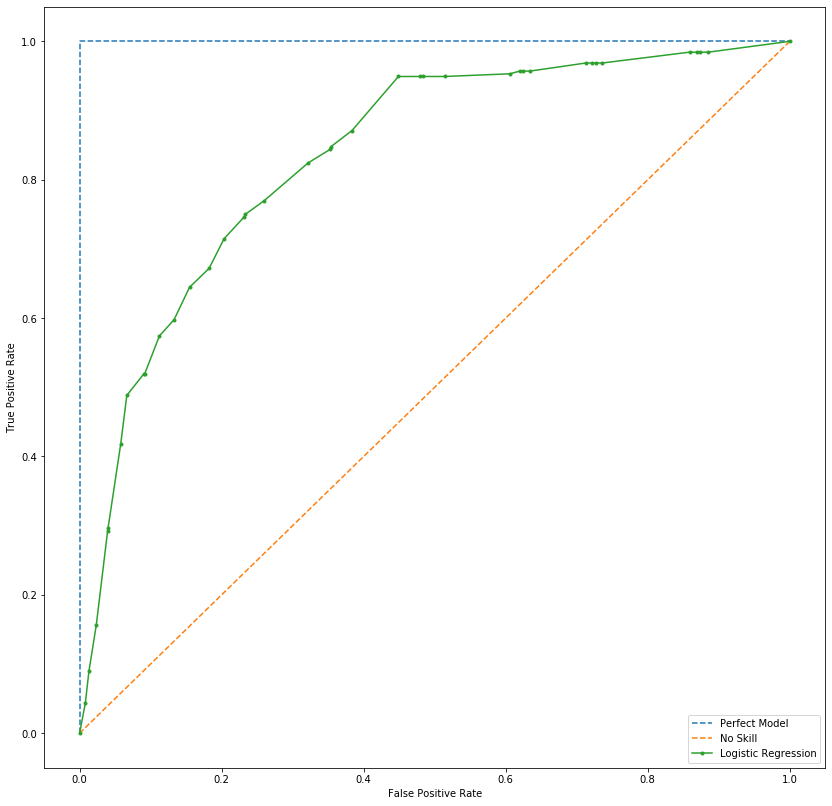

In [48]:
# predict probabilities
# keep probabilities for the positive outcome only

y_pred_lr = lr.predict_proba(X_test)[:,1]
y_pred = y_pred_prob > threshold
y_pred_prob = y_pred_lr
y_ns_probs = [0 for _ in range(len(y_test))]
y_pf_probs = [1 for _ in range(len(y_test))]

# calculate scores
#No skill score
ns_auc = roc_auc_score(y_test, y_ns_probs)
#Logistic regression score
lr_auc = roc_auc_score(y_test, y_pred_prob)

# No skill ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_ns_probs)
# Perfect ROC
pf_fpr, pf_tpr, _ = roc_curve(y_test, y_test)
# Linear Regression ROC
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_prob)
# plot size
plt.figure(figsize=(14,14))
# plot the roc curve for all the model!!!
plt.plot(pf_fpr, pf_tpr, linestyle='--', label='Perfect Model')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


# summarize all the scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# Calculate the data for roc curves

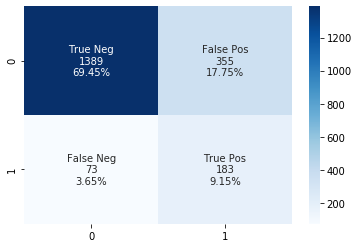

In [18]:
# Confusion matrix analysis
cf_matrix=confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

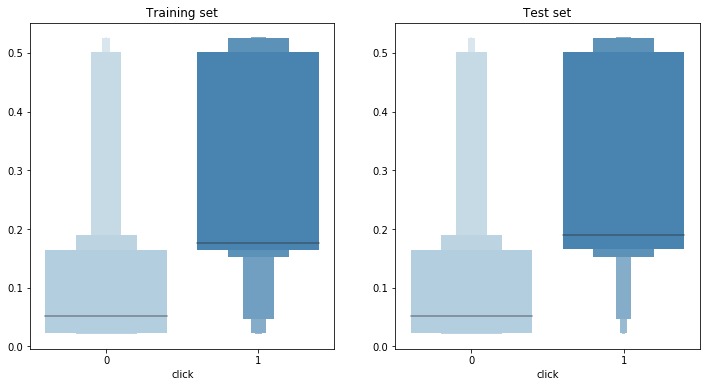

In [49]:
# Boxer plot: generated by Yuxin
y_test_pred = lr.predict_proba(X_test)[:,1]
y_train_pred = lr.predict_proba(X_train)[:,1]
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.boxenplot(x=y_train, y=y_train_pred, palette="Blues", ax=ax[0])
ax[0].set_title('Training set')
sns.boxenplot(x=y_test, y=y_test_pred, palette="Blues", ax=ax[1])
ax[1].set_title('Test set')
plt.show()

# Lasso

In [50]:

lasso = Lasso(alpha, normalize = True, max_iter = 1000000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
threshold = 0.18
y_pred_prob_lasso = y_pred_lasso
y_pred_lasso = y_pred_prob_lasso > threshold
print('Log loss:', log_loss(y_test, y_pred_prob_lasso))
print('Accuracy score:', accuracy_score(y_test, y_pred_lasso)) 
print("Recall rate:", recall_score(y_test, y_pred_lasso))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lasso)    
print('AUC metric:', auc(fpr, tpr))

Log loss: 0.3466072686891587
Accuracy score: 0.8765
Recall rate: 0.48828125
AUC metric: 0.710883744266055


# Ridge

In [51]:

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
threshold = 0.1
y_pred_prob_ridge = y_pred_ridge
y_pred_ridge = y_pred_prob_ridge > threshold
print('Log loss:', log_loss(y_test, y_pred_prob_ridge))
print('Accuracy score:', accuracy_score(y_test, y_pred_ridge)) 
print("Recall rate:", recall_score(y_test, y_pred_ridge))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ridge)    
print('AUC metric:', auc(fpr, tpr))

Log loss: 0.28934408703695835
Accuracy score: 0.602
Recall rate: 0.94921875
AUC metric: 0.8381616434919724


## Ensemble learning (Gradient boosting!)

In [55]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict_proba(X_test)[:,1]

In [57]:
# Discovering the best p value
'''
for p in np.array(range(1500, 2700,2)) / 10000:
    threshold = p
    y_pred_prob = y_pred_gb
    y_pred = y_pred_gb > threshold
    print('p=', p)
    #print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
    #print('Log loss:', log_loss(y_test, y_pred_prob))
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print("Recall rate:", recall_score(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    print('AUC metric:', auc(fpr, tpr))
'''

'\nfor p in np.array(range(1500, 2700,2)) / 10000:\n    threshold = p\n    y_pred_prob = y_pred_gb\n    y_pred = y_pred_gb > threshold\n    print(\'p=\', p)\n    #print(\'Prob of clicking:\', np.mean(y_test), np.mean(y_pred))\n    #print(\'Log loss:\', log_loss(y_test, y_pred_prob))\n    print(\'Accuracy score:\', accuracy_score(y_test, y_pred))\n    print("Recall rate:", recall_score(y_test, y_pred))\n    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)\n    print(\'AUC metric:\', auc(fpr, tpr))\n'

In [58]:
    threshold = 0.1704
    y_pred_prob = y_pred_gb
    y_pred = y_pred_gb > threshold
    print('p=', p)
    #print('Prob of clicking:', np.mean(y_test), np.mean(y_pred))
    #print('Log loss:', log_loss(y_test, y_pred_prob))
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print("Recall rate:", recall_score(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    print('AUC metric:', auc(fpr, tpr))

p= 0.2698
Accuracy score: 0.7345
Recall rate: 0.765625
AUC metric: 0.8401842029816513


## Neural Network

In [60]:
#MLP model
mlp = MLPClassifier(hidden_layer_sizes=(64,512,4,),max_iter=10000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 512, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [30]:
y_pred_nn = mlp.predict(X_test)
y_pred_prob_nn = mlp.predict_proba(X_test)

In [31]:
print(log_loss(y_test, y_pred_prob_nn))
print(accuracy_score(y_test, y_pred_nn))
print(recall_score(y_test, y_pred_nn))

0.29009689577209685
0.873
0.23046875


In [32]:
print('meann of predict:',np.mean(y_pred_nn) )
print('meann of test:',np.mean(y_test) )


meann of predict: 0.058
meann of test: 0.128


# Random Forest, multilayer NN and more plotting

In [33]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict_proba(X_test)[:,1]

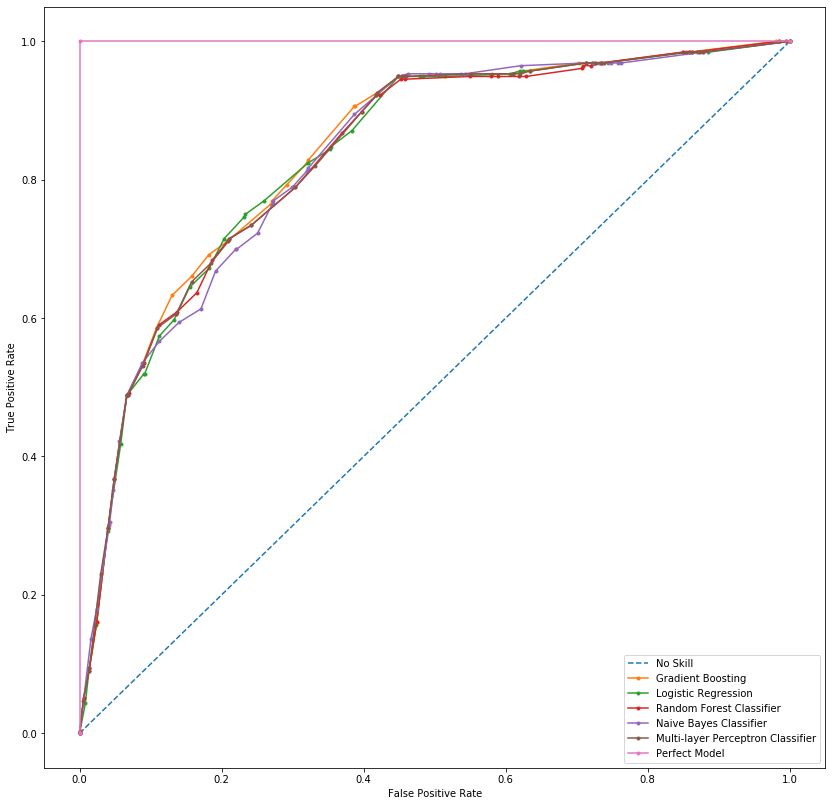

In [62]:

# All the code idea similar to above
# but all the models
threshold=0.17


# calculate scores
ns_auc = roc_auc_score(y_test, y_ns_probs)
y_ns_probs = [0 for _ in range(len(y_test))]

gb.fit(X_train, y_train)

y_pred_rfc = rfc.predict_proba(X_test)[:,1]
y_pred = y_pred_prob > threshold
y_pred_prob = y_pred_rfc

gb_auc = roc_auc_score(y_test, y_pred_gb)

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict_proba(X_test)[:,1]
y_pred = y_pred_prob > threshold
y_pred_prob = y_pred_rfc

rfc_auc = roc_auc_score(y_test, y_pred_rfc)
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict_proba(X_test)[:,1]
y_pred = y_pred_prob > threshold
y_pred_prob = y_pred_gnb

gnb_auc = roc_auc_score(y_test, y_pred_gnb)
svc.fit(X_train, y_train)

y_pred_mlp = mlp.predict_proba(X_test)[:,1]
y_pred = y_pred_prob > threshold
y_pred_prob = y_pred_mlp

mlp_auc = roc_auc_score(y_test, y_pred_mlp)
svc.fit(X_train, y_train)

#y_pred_svc = svc.predict_proba(X_test)[:,1]
#y_pred = y_pred_prob > threshold
#y_pred_prob = y_pred_svc
#y_ns_probs = [0 for _ in range(len(y_test))]

#svc_auc = roc_auc_score(y_test, y_pred_svc)




# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
#print('Logistic: ROC AUC=%.3f' % (rfc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, y_pred_rfc)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_pred_gnb)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, y_pred_mlp)

#
plt.figure(figsize=(14,14))
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Naive Bayes Classifier')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Multi-layer Perceptron Classifier')
plt.plot(pf_fpr, pf_tpr, marker='.', label='Perfect Model')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

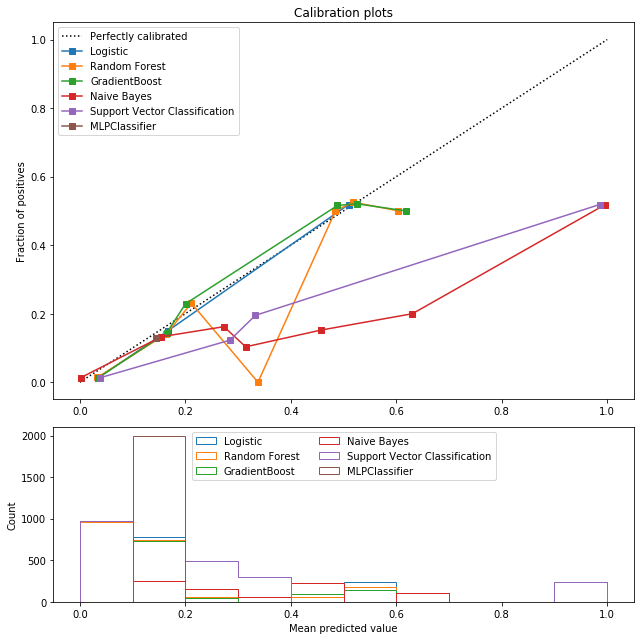

In [67]:
# Callibration plot
plt.figure(figsize=(9, 9))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
# First plot
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

#For loop of classifiers
for classifier, name in [(lr, 'Logistic'),
                 (rfc, 'Random Forest'),
                 (gb_clf, 'GradientBoost'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (mlp, 'MLPClassifier'),
]:
#Fit all datas first 
    classifier.fit(X_train, y_train)
# Find positive probability if there is predict probabiliy feature
    if hasattr(classifier, "predict_proba"):
        prob_pos = classifier.predict_proba(X_test)[:, 1]
    else:  
# we will use the decision function if there is no predict probability feature
        prob_pos = classifier.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
# As what the name says right?
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=1)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="upper left")
ax1.set_title('Calibration plots')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
